In [1]:
import os
import numpy as np
import random
import sys
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

import time
import argparse
import yaml
import pdb
import inspect
import shutil
from collections import OrderedDict

In [13]:
transform = transforms.Compose([    transforms.Resize((32*8, 32*8)),
                                    transforms.RandomCrop(224),
                                    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                    transforms.RandomHorizontalFlip(p = 1),
                                    transforms.ToTensor()
                                ])

test_dataset = datasets.CIFAR100(root='./data',
                                train=False,
                                download=True,
                                transform=transform)

Files already downloaded and verified


In [3]:
exp_dir = './work_dir/cifar100/resnet50_0.1_SGD'
model_weight_file_name = ''
epoch = 31
for run_file in os.listdir(exp_dir) :
    if f"runs-{epoch}" in run_file  and '.pt' in run_file:
        model_weight_file_name = run_file
weights = torch.load(os.path.join(exp_dir,model_weight_file_name))

In [4]:
model_weight_file_name

'runs-31.pt'

In [5]:
# weights.keys()

In [6]:
del weights['fc.weight']

In [7]:
del weights['fc.bias']

In [8]:
from model.ResNet50_cam import ResNet50_cam

In [9]:
model = ResNet50_cam(in_channel=3, num_classes=100)

In [10]:
model.load_state_dict(weights)

<All keys matched successfully>

In [14]:
data_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=True)           

In [15]:
for batch_idx, (data, label) in enumerate(data_loader) :
    print(data.shape)
    print(label.shape)
    break

torch.Size([16, 3, 224, 224])
torch.Size([16])


In [16]:
model(data).shape

torch.Size([16, 2048, 4, 4])

In [ ]:
self.train_frames_cnt = np.loadtxt('data/oad/train_frames_cnt.txt', dtype=int)
self.test_frames_cnt = np.loadtxt('data/oad/test_frames_cnt.txt', dtype=int)

In [17]:
import os

In [18]:
data_path = './data/CUB_200_2011'

In [174]:
train_test_split_file = os.path.join(data_path, 'train_test_split.txt')
image_names_file = os.path.join(data_path, 'images.txt')
class_names_file = os.path.join(data_path, 'classes.txt')
labels_file = os.path.join(data_path, 'image_class_labels.txt')
bds_file = os.path.join(data_path, 'bounding_boxes.txt')
images_path = os.path.join(data_path, 'images')
save_image_path = os.path.join(data_path, 'data.pkl')
save_gt_path = os.path.join(data_path, 'gts.pkl')

In [176]:
# Dictionary : phase => image_ids
image_id = dict()
image_id['train'] = []
image_id['test'] = []

indices = np.loadtxt(train_test_split_file)
for index in indices:
    if index[1]:
        train_image_id = int(index[0])
        image_id['train'].append(train_image_id)
    else:
        test_image_id = int(index[0])
        image_id['test'].append(test_image_id)

In [70]:
# Dictionary : class_id => class_name
with open(class_names_file, 'r') as f:
    class_infos = f.readlines()
    class_pairs = [pair[:-1].split(' ') for pair in class_infos]

class_names = dict()
for p in class_pairs:
    class_names[int(p[0])] = p[1]


In [73]:
# Dictionary : image_id => image_file_name
with open(image_names_file, 'r') as f:
    image_infos = f.readlines()
    image_pairs = [pair[:-1].split(' ') for pair in image_infos]

image_names = dict()
for p in image_pairs:
    image_names[int(p[0])] = p[1]


In [168]:
# Dictionary : image_id => image_rgb
with open(image_names_file, 'r') as f:
    image_infos = f.readlines()
    image_pairs = [pair[:-1].split(' ') for pair in image_infos]

image_data = dict()
for p in image_pairs:
    image_data[int(p[0])] = Image.open(os.path.join(images_path, p[1]))

In [ ]:
with open(save_label_pkl, 'wb') as fw:
    pickle.dump(labels_data, fw, pickle.HIGHEST_PROTOCOL)

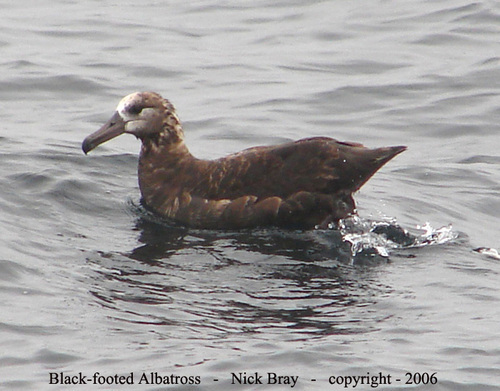

In [173]:
image_data[8]

In [83]:
# Dictionary : image_id => [label, bounding_box]

gt = dict()

with open(labels_file, 'r') as f:
    labels_infos = f.readlines()
    labels_pairs = [pair[:-1].split(' ') for pair in labels_infos]

for p in labels_pairs:
    gt[int(p[0])] = [int(p[1])]

with open(bds_file, 'r') as f:
    bds_infos = f.readlines()
    bds_pairs = [pair[:-1].split(' ') for pair in bds_infos]

for p in bds_pairs:
    gt[int(p[0])].append([float(p[1]), float(p[2]), float(p[3]), float(p[4])])

In [178]:
len(image_id['test'])

5794

In [171]:
from PIL import Image

from PIL import Image
import torchvision.transforms as transforms

# Read the image
image = Image.open(os.path.join(images_path, image_names[8]))

# Define a transform to convert the image to tensor
transform = transforms.ToTensor()

# Convert the image to PyTorch tensor
tensor = transform(image)


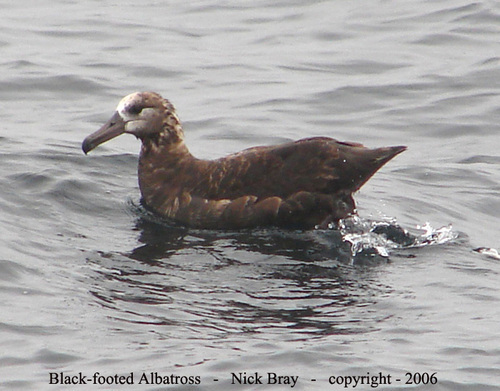

In [172]:
image

In [155]:
tensor.shape

torch.Size([3, 391, 500])

In [161]:
a = torch.tensor([[[2,4,3],[5,6,11]], [[1, 7,12], [8, 9,13]]])
print(a)

tensor([[[ 2,  4,  3],
         [ 5,  6, 11]],

        [[ 1,  7, 12],
         [ 8,  9, 13]]])


In [162]:
a.shape

torch.Size([2, 2, 3])

In [167]:
torch.transpose(a, 1, 2)

tensor([[[ 2,  5],
         [ 4,  6],
         [ 3, 11]],

        [[ 1,  8],
         [ 7,  9],
         [12, 13]]])

In [156]:
image.size

(500, 391)

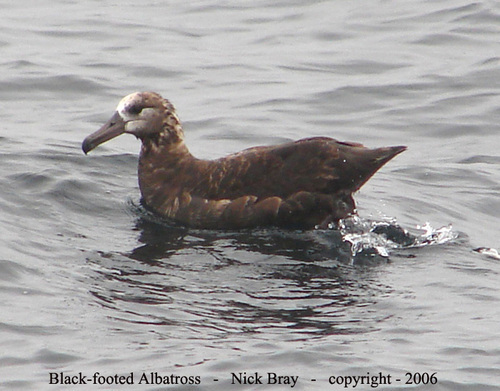

In [153]:
image

In [125]:
transform = transforms.Compose([    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    # transforms.Normalize(_CIFAR_MEAN, _CIFAR_STD)
                                ])
# transform.transforms.insert(0, RandAugment(2, 9))

In [127]:
transform(image)

tensor([[[0.0118, 0.0118, 0.0863,  ..., 0.0157, 0.0118, 0.0078],
         [0.0196, 0.0196, 0.1059,  ..., 0.0118, 0.0078, 0.0078],
         [0.0118, 0.0196, 0.0314,  ..., 0.0118, 0.0039, 0.0078],
         ...,
         [0.0118, 0.0157, 0.0078,  ..., 0.2745, 0.2941, 0.2902],
         [0.0118, 0.0235, 0.0118,  ..., 0.2784, 0.3098, 0.3137],
         [0.0078, 0.0118, 0.0039,  ..., 0.2863, 0.3059, 0.3216]],

        [[0.2667, 0.2706, 0.2980,  ..., 0.3294, 0.3294, 0.3255],
         [0.2745, 0.2706, 0.2941,  ..., 0.3255, 0.3294, 0.3294],
         [0.2588, 0.2667, 0.2431,  ..., 0.3333, 0.3333, 0.3333],
         ...,
         [0.2941, 0.2863, 0.2824,  ..., 0.4824, 0.4902, 0.4863],
         [0.2941, 0.2941, 0.2902,  ..., 0.4824, 0.4980, 0.4941],
         [0.2941, 0.2941, 0.2980,  ..., 0.4902, 0.4941, 0.5020]],

        [[0.4353, 0.4471, 0.4471,  ..., 0.5725, 0.5725, 0.5765],
         [0.4392, 0.4510, 0.4431,  ..., 0.5686, 0.5725, 0.5843],
         [0.4314, 0.4471, 0.4353,  ..., 0.5765, 0.5804, 0.

In [ ]:
for inputs, _labels in tqdm(full_loader):
    for i in range(N_CHANNELS):
        mean[i] += inputs[:,i,:,:].mean()
        std[i] += inputs[:,i,:,:].std()
mean.div_(len(dataset))
std.div_(len(dataset))
print(mean, std)

print("time elapsed: ", time()-before)